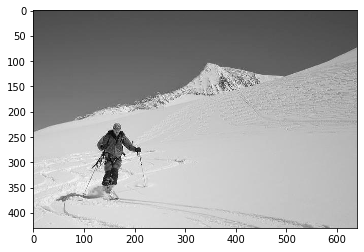

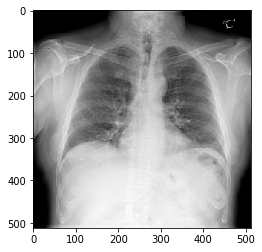

In [9]:
from skimage import data
import matplotlib.pyplot as plt
from skimage import io

a=io.imread('000000038118.jpg')
b=io.imread('CXR7_IM-2263-1001.png')

plt.imshow(a,cmap='gray',interpolation='nearest')
plt.show()
plt.imshow(b, cmap='gray', interpolation='nearest') 
plt.show()

In [10]:
from models.lip import LIPImage,LIPSpace
from models.hlip import HLIPImage,HLIPSpace
from models.pslip import PSLIPImage,PSLIPSpace

In [11]:
import numpy as np
from skimage.filters import sobel

### Lineal

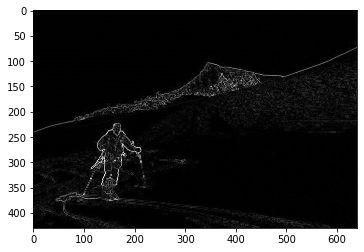

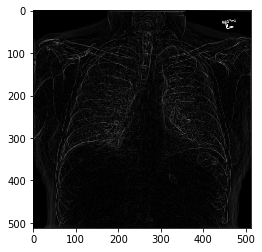

In [12]:
la=np.array(a.tolist())

sla=sobel(la)

plt.imshow(sla,cmap='gray',interpolation='nearest')
plt.show()

lb=np.array(b.tolist())

slb=sobel(lb)

plt.imshow(slb,cmap='gray',interpolation='nearest')
plt.show()

### LIP

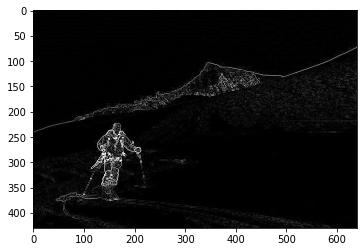

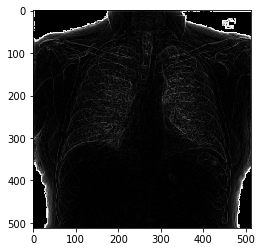

In [13]:
js=LIPSpace()

ja=js.function(js.gray_tone(a))

sja=js.M-js.inverse_gray_tone(js.inverse_function(sobel(ja)))

plt.imshow(sja,cmap='gray',interpolation='nearest')
plt.show()

jb=js.function(js.gray_tone(b))

sjb=js.M-js.inverse_gray_tone(js.inverse_function(sobel(jb)))

plt.imshow(sjb,cmap='gray',interpolation='nearest')
plt.show()

### HLIP

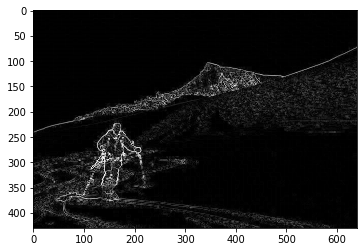

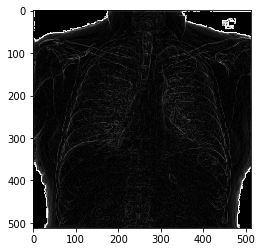

In [14]:

hs=HLIPSpace()

ha=hs.function(hs.gray_tone(a))

sha=hs.inverse_gray_tone(hs.inverse_function(sobel(ha)))

plt.imshow(sha,cmap='gray',interpolation='nearest')
plt.show()

hb=hs.function(hs.gray_tone(b))

shb=hs.inverse_gray_tone(hs.inverse_function(sobel(hb)))

plt.imshow(shb,cmap='gray',interpolation='nearest')
plt.show()

### PSLIP

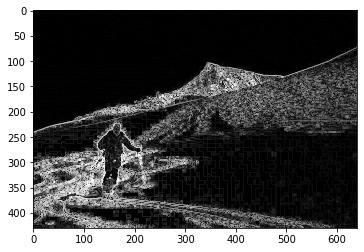

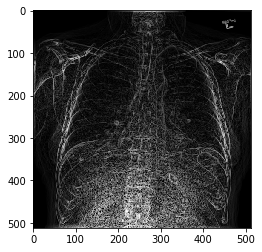

In [15]:

pss=PSLIPSpace()

psa=pss.function(pss.gray_tone(a))

spsa=pss.inverse_gray_tone(pss.inverse_function(sobel(psa)))

plt.imshow(spsa,cmap='gray',interpolation='nearest')
plt.show()

psb=pss.function(pss.gray_tone(b))

spsb=pss.inverse_gray_tone(pss.inverse_function(sobel(psb)))

plt.imshow(spsb,cmap='gray',interpolation='nearest')
plt.show()